In [1]:
import ase
from ase import build
from ase import io
from ase.visualize import view
import numpy as np

import utils

In [2]:
orig = build.bulk('Fe', orthorhombic=True)
# iron.positions -= 0.75 * (cell_mtx[0] + cell_mtx[1])

iron = orig.copy()
a, b, c = iron.cell.array
cutoff_sq = 4**2
# Add atoms to show environment, but not towards the viewer
for i in range(-3, 4):
    for j in range(-3, 4):
        for k in range(-3,1):
            if i == j == k == 0:
                continue
            for pos in orig.positions:
                dr = i * a + j * b + k * c + pos
                if np.dot(dr, dr) > cutoff_sq:
                    continue
                iron.append(ase.Atom('Fe', dr))
            
# iron.positions += 0.5 * (a + b + c)
view(iron)

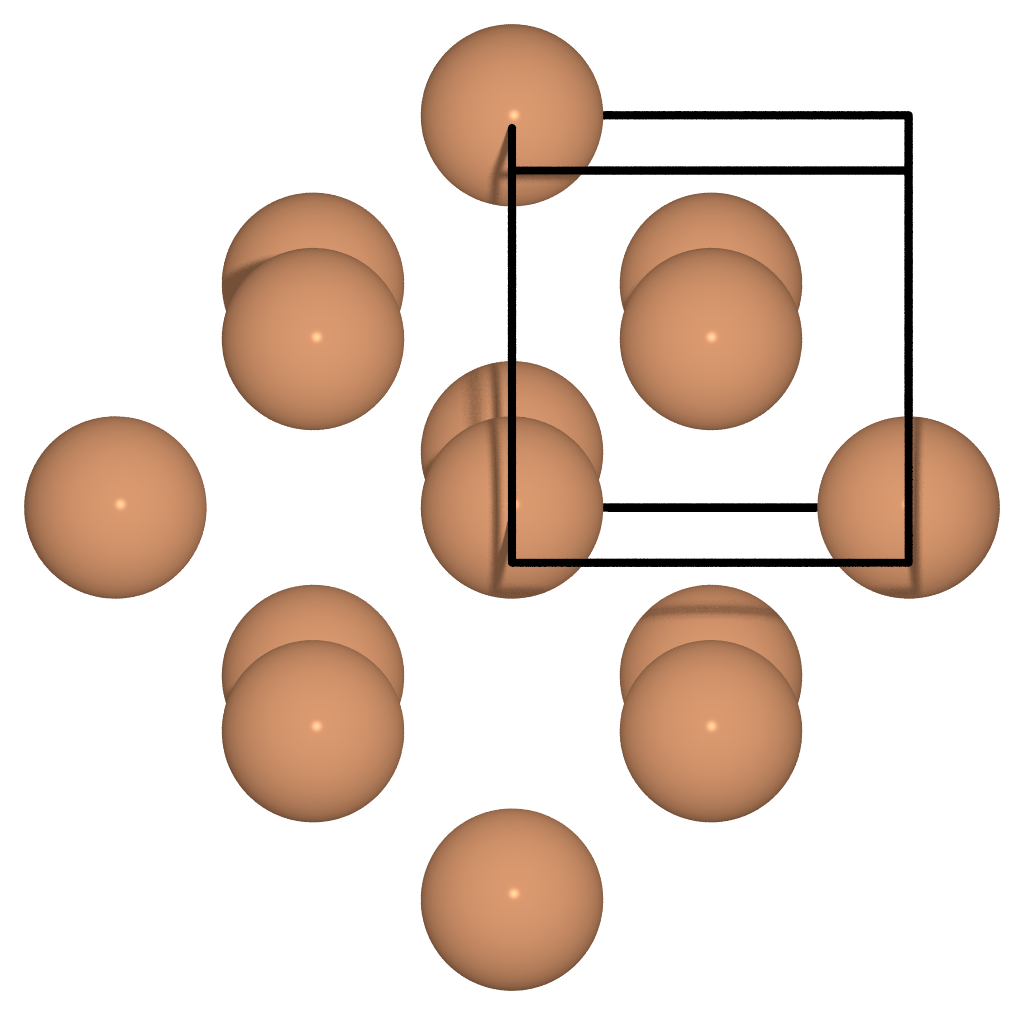

In [3]:
utils.create_povray_img(iron, 'img/iron', x=8, radii=0.5)

("nice.png")

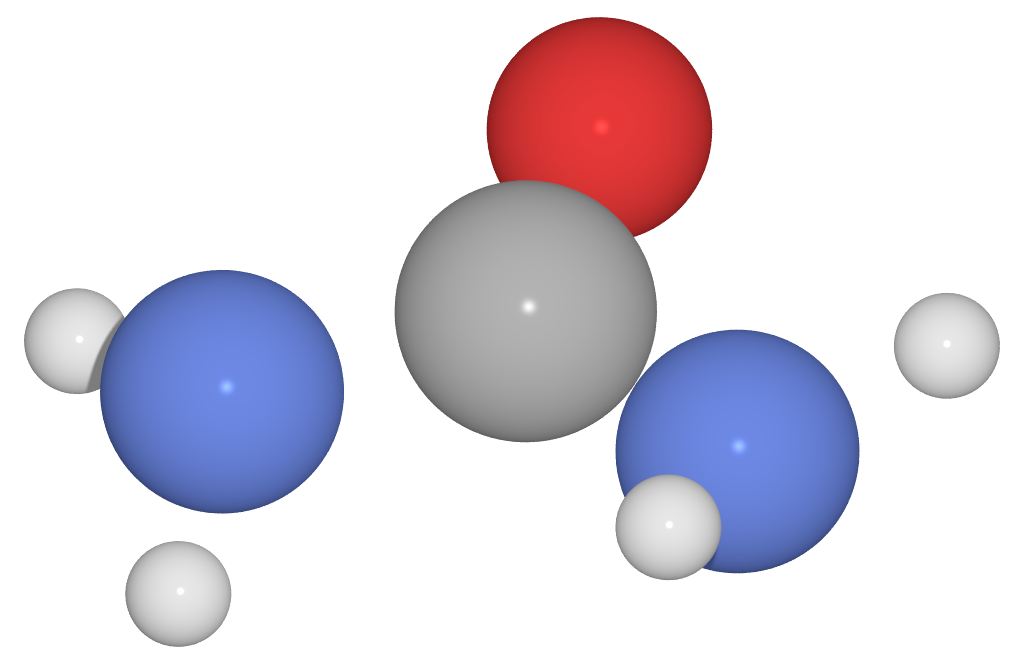

In [4]:
urea = io.read('data/urea.pdb')
utils.create_povray_img(urea, 'img/urea_3d', x=-50, y=-20, z=0, radii=0.75)